# jieba安装

安装命令
pip install jieba -i https://pypi.tuna.tsinghua.edu.cn/simple

# 分词工具

In [2]:
import jieba

string = '今天天气很好，适合出去散步'
# 全模式
seg_generator = jieba.cut(string, cut_all=True)
for s in seg_generator:
    print(s)

print('-'*10)
# 精确模式 ( 默认 )
seg_generator = jieba.cut(string, cut_all=False)
for s in seg_generator:
    print(s)

今天
今天天气
天天
天气
很
好
，
适合
合出
出去
散步
----------
今天天气
很
好
，
适合
出去
散步


# 添加自定义词典

In [3]:
text = "故宫的著名景点包括乾清宫、太和殿和黄琉璃瓦等"

# 全模式
seg_gen = jieba.cut(text, cut_all=True)
print('全模式  :', '-'.join(seg_gen))

# 精确模式
seg_gen = jieba.cut(text, cut_all=False)
print('精确模式:', '-'.join(seg_gen))

全模式  : 故宫-的-著名-著名景点-景点-包括-乾-清宫-、-太和-太和殿-和-黄-琉璃-琉璃瓦-等
精确模式: 故宫-的-著名景点-包括-乾-清宫-、-太和殿-和-黄-琉璃瓦-等


In [4]:
jieba.load_userdict('./data/mydict.txt')

text = "故宫的著名景点包括乾清宫、太和殿和黄琉璃瓦等"

# 全模式
seg_gen = jieba.cut(text, cut_all=True)
print('全模式  :', '-'.join(seg_gen))

# 精确模式
seg_gen = jieba.cut(text, cut_all=False)
print('精确模式:', '-'.join(seg_gen))

全模式  : 故宫-的-著名-著名景点-景点-包括-乾-清宫-、-太和-太和殿-和-黄-琉璃-琉璃瓦-等
精确模式: 故宫-的-著名景点-包括-乾-清宫-、-太和殿-和-黄-琉璃瓦-等


# 关键词抽取

In [5]:
import jieba.analyse

seg_gen = jieba.cut(text, cut_all=False)
print("分词结果: ", '-'.join(seg_gen))

# 抽取关键词
tags = jieba.analyse.extract_tags(text, topK=5)
print("type(tags) = ", type(tags))
print("关键词: ", " ".join(tags))

分词结果:  故宫-的-著名景点-包括-乾-清宫-、-太和殿-和-黄-琉璃瓦-等
type(tags) =  <class 'list'>
关键词:  著名景点 太和殿 琉璃瓦 故宫 清宫


In [6]:
tags = jieba.analyse.extract_tags(text, topK=5, withWeight=True)
print("type(tags) = ", type(tags))
for t in tags:
    print(t)

type(tags) =  <class 'list'>
('著名景点', 2.3167796086666668)
('太和殿', 1.6938346722833335)
('琉璃瓦', 1.5803061740300002)
('故宫', 1.5411195503033335)
('清宫', 1.2424929720983333)


# 词性标注

In [7]:
import jieba.posseg

words = jieba.posseg.cut("我爱北京天安门")
for word, flag in words:
    print(word, flag)

我 r
爱 v
北京 ns
天安门 ns


# 词云展示

{'习近平': 3, '代表': 5, '第十八届': 3, '中央委员会': 3, '十九': 2, '大作': 1, '报告': 5, '新华社': 1, '北京': 3, '10': 2, '18': 2, '日电': 1, '同志': 18, '中国共产党': 19, '第十九次': 3, '全国代表大会': 3, '以下': 3, '全文': 1, '2017': 1, '现在': 2, '大会': 3, '全面': 88, '建成': 22, '小康社会': 16, '决胜': 7, '阶段': 9, '中国': 168, '特色': 79, '社会主义': 146, '进入': 10, '时代': 63, '关键时期': 1, '召开': 3, '一次': 1, '十分': 3, '重要': 18, '主题': 7, '不忘': 3, '初心': 6, '牢记': 4, '使命': 9, '高举': 4, '伟大旗帜': 3, '夺取': 8, '伟大胜利': 4, '实现': 83, '中华民族': 43, '伟大': 58, '复兴': 32, '不懈': 4, '奋斗': 18, '方得': 1, '始终': 16, '就是': 6, '人民': 157, '幸福': 5, '这个': 9, '激励': 7, '不断前进': 1, '根本': 16, '动力': 6, '全党同志': 4, '一定': 9, '永远': 6, '同呼吸': 1, '共命运': 1, '心连心': 1, '美好生活': 14, '向往': 3, '作为': 12, '奋斗目标': 8, '永不': 3, '懈怠': 4, '精神状态': 1, '一往无前': 1, '姿态': 3, '继续': 10, '朝着': 3, '宏伟目标': 1, '奋勇前进': 3, '当前': 2, '国内外': 3, '形势': 4, '正在': 3, '发生': 4, '深刻': 11, '复杂': 7, '变化': 11, '我国': 50, '发展': 212, '处于': 4, '战略': 36, '机遇期': 1, '前景': 3, '光明': 3, '挑战': 7, '严峻': 2, '登高望远': 1, '居安思危': 2, '勇于': 11, '变革': 11, '勇

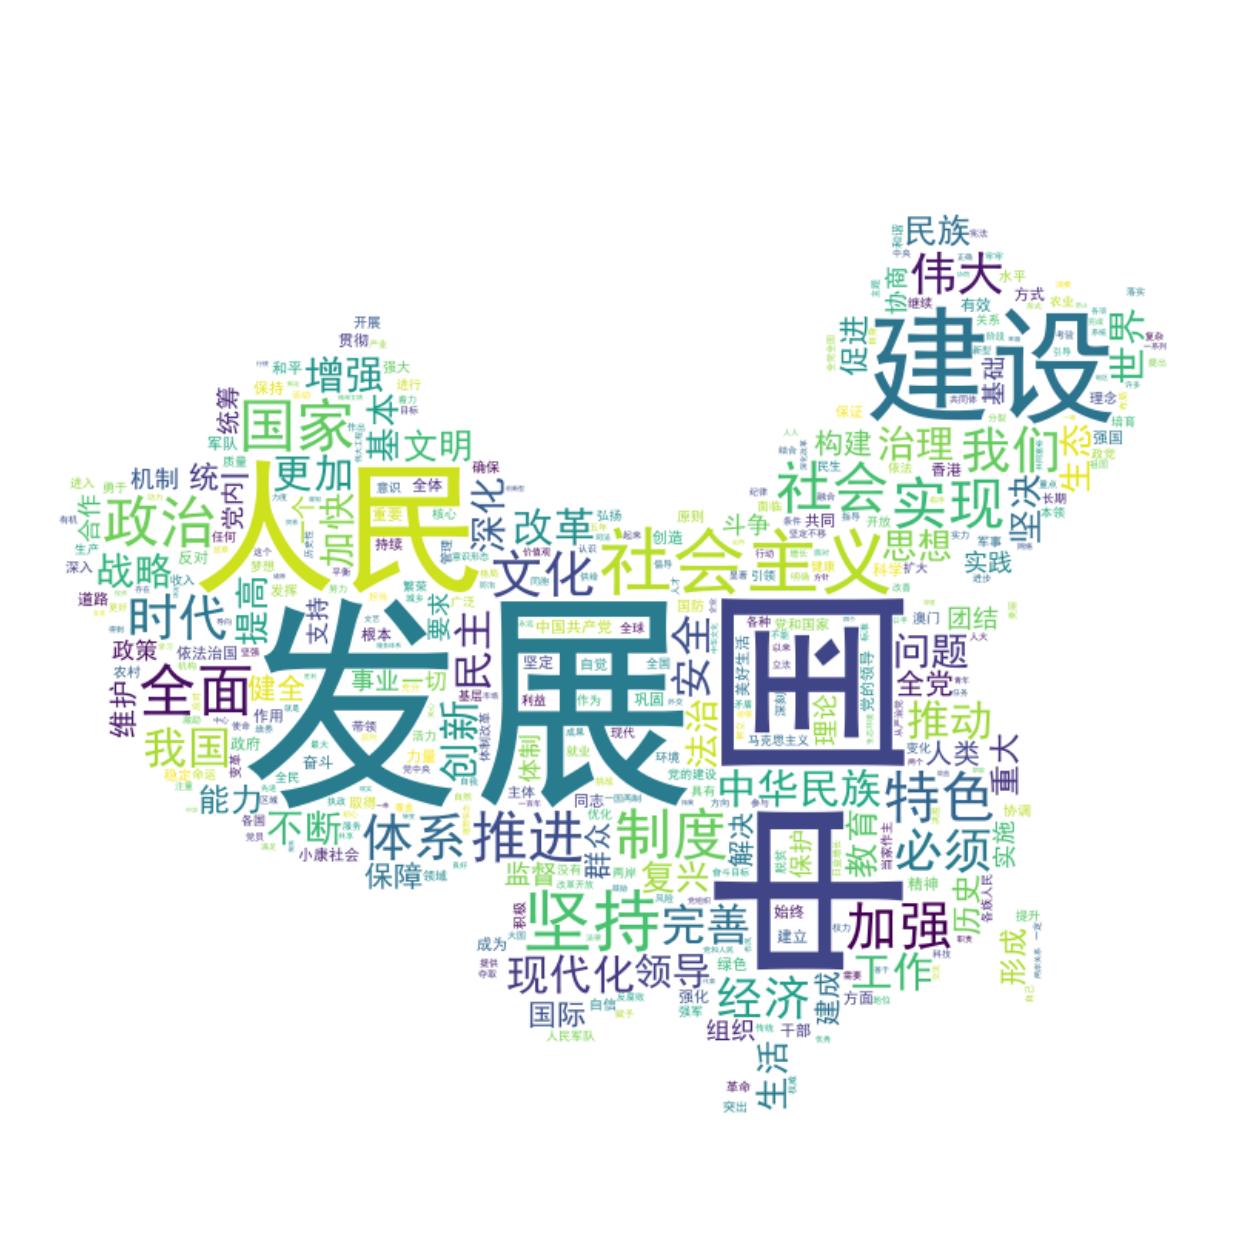

In [6]:
import jieba
from wordcloud import WordCloud
import cv2
import matplotlib.pyplot as plt

datas = {}

with open('./data/19Congress.txt', 'r', encoding='utf-8') as fr:
    text = fr.read()

with open('./data/stopwords.txt', 'r', encoding='utf-8') as fr:
    stopwords = {i.strip() for i in fr.readlines()}

seg_gen = jieba.cut(text, cut_all=False)
for word in seg_gen:
    if len(word) >= 2:
        if word not in datas:
            datas[word] = 0
        datas[word] += 1

print(datas)

my_wordcloud = WordCloud(
    background_color='white',   # 设置背景色
    max_words=400,          # 设置最大实现的字数
    font_path='./data/SimHei.ttf',   # 设置字体颜色, 如不设置显示不了中文
    mask=cv2.imread('./data/mapofChina.jpg'),
    width=1000,
    height=1000,
    stopwords=stopwords).generate_from_frequencies(datas)

plt.figure(figsize=(18, 16))
plt.imshow(my_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
